In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

In [24]:
from keras.models import Sequential, load_model
from keras.layers import Convolution2D as Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout, Activation

from keras.preprocessing.image import ImageDataGenerator, load_img

In [19]:
input_shape=(150,150,3)
img_width, img_height = 150, 150


In [20]:
train_data = '/content/drive/My Drive/augmented_image'
validation_data ='/content/drive/My Drive/Amazon_webscraping/Test'

In [33]:
datagen=ImageDataGenerator(rescale=1./255)

train_generator=datagen.flow_from_directory(
         train_data,
         target_size=(img_width,img_height),
         batch_size=32,
         class_mode='categorical')

validation_generator=datagen.flow_from_directory(
         validation_data,
         target_size=(img_width,img_height),
         batch_size=32,
         class_mode='categorical')

Found 1568 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [34]:
nb_train_samples=1842
nb_validation_samples=82
batch_size=32
epochs=10

In [35]:

#model building
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

#flatten layer
model.add(Flatten()) 
# Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Dense(3, activation='softmax'))

In [36]:

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_8 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_9 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 32)       

In [37]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("Model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto')


history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    callbacks=[checkpoint,early])

Epoch 1/10
57/57 [==============================] - 54s 955ms/step - loss: 1.0234 - accuracy: 0.5225 - val_loss: 0.9081 - val_accuracy: 0.3333

Epoch 00001: val_accuracy improved from -inf to 0.33333, saving model to Model.h5
Epoch 2/10
57/57 [==============================] - 53s 933ms/step - loss: 0.7453 - accuracy: 0.6957 - val_loss: 1.6707 - val_accuracy: 0.4167

Epoch 00002: val_accuracy improved from 0.33333 to 0.41667, saving model to Model.h5
Epoch 3/10
57/57 [==============================] - 53s 929ms/step - loss: 0.6758 - accuracy: 0.6941 - val_loss: 1.8402 - val_accuracy: 0.3667

Epoch 00003: val_accuracy did not improve from 0.41667
Epoch 4/10
57/57 [==============================] - 58s 1s/step - loss: 0.6258 - accuracy: 0.7226 - val_loss: 1.7734 - val_accuracy: 0.3333

Epoch 00004: val_accuracy did not improve from 0.41667
Epoch 5/10
57/57 [==============================] - 53s 933ms/step - loss: 0.5760 - accuracy: 0.7379 - val_loss: 2.0798 - val_accuracy: 0.3333

Epoch 

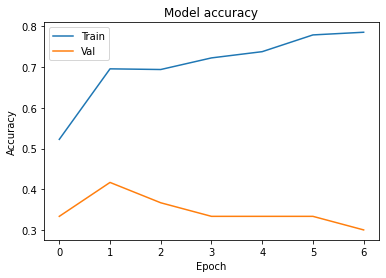

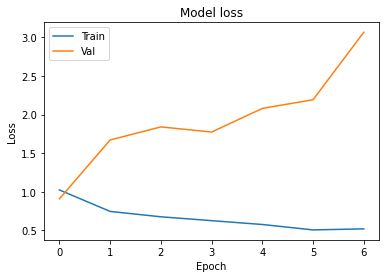

In [39]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()